# Supervised Repertoire Classification

While solving a sequence classification can be useful in the cases where the label applies to every sequence in a sample (such as in tetramer-sorted T-cells), there are times where the label may truly only apply to a set of sequences. For example, in the case where one may sequence tumor-infiltrating lymphocytes (TIL) and  there is a label at the repertoire/sample level such as which therapy the sample received. In this case, there may be a structural signature within a set of sequences that is predictive but not every single sequence has that signature. This is a case where we want to learn what is the structural signature buried in a set of sequenes and which sequences carry this signature.

To demo this utility of a repertoire/sample level classifier, we will first upload dat from the Rudqvist dataseet. In this dataset, 20 mice with implanted tumors were treated with 4 modes of therapy (Control, 9H10, RT, or Combo). We want to know whether the TCRrepertoire from their tumors is predictive of the therapy they received.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_WF

# Instantiate training object
DTCR_WF = DeepTCR_WF('Tutorial')

#Load Data from directories
DTCR_WF.Get_Data(directory='../../Data/Rudqvist',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=1,count_column=2,v_beta_column=7,d_beta_column=14,j_beta_column=21)

Following loading the data, we will split our data into test/train and then train the model.

In [2]:
DTCR_WF.Get_Train_Valid_Test(test_size=0.25)
DTCR_WF.Train()

Training_Statistics: 
 Epoch: 1/10000 Training loss: 1.40491 Validation loss: 1.36359 Testing loss: 1.42643 Training Accuracy: 0.25 Validation Accuracy: 0.25 Testing Accuracy: 0.25 Testing AUC: 0.16667
Training_Statistics: 
 Epoch: 2/10000 Training loss: 1.39528 Validation loss: 1.36200 Testing loss: 1.42000 Training Accuracy: 0.33333 Validation Accuracy: 0.5 Testing Accuracy: 0.25 Testing AUC: 0.16667
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.38670 Validation loss: 1.36104 Testing loss: 1.41415 Training Accuracy: 0.33333 Validation Accuracy: 0.5 Testing Accuracy: 0.25 Testing AUC: 0.16667
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.37863 Validation loss: 1.36027 Testing loss: 1.40858 Training Accuracy: 0.33333 Validation Accuracy: 0.5 Testing Accuracy: 0.25 Testing AUC: 0.16667
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.37099 Validation loss: 1.35959 Testing loss: 1.40396 Training Accuracy: 0.33333 Validation Accuracy: 0.5 Testing Accuracy: 0.5 Test

Training_Statistics: 
 Epoch: 45/10000 Training loss: 1.10307 Validation loss: 1.34494 Testing loss: 1.26718 Training Accuracy: 0.83333 Validation Accuracy: 0.5 Testing Accuracy: 0.5 Testing AUC: 0.66667
Training_Statistics: 
 Epoch: 46/10000 Training loss: 1.09544 Validation loss: 1.34473 Testing loss: 1.26289 Training Accuracy: 0.83333 Validation Accuracy: 0.5 Testing Accuracy: 0.5 Testing AUC: 0.66667
Training_Statistics: 
 Epoch: 47/10000 Training loss: 1.08770 Validation loss: 1.34448 Testing loss: 1.25840 Training Accuracy: 0.83333 Validation Accuracy: 0.5 Testing Accuracy: 0.5 Testing AUC: 0.66667
Training_Statistics: 
 Epoch: 48/10000 Training loss: 1.07992 Validation loss: 1.34416 Testing loss: 1.25421 Training Accuracy: 0.83333 Validation Accuracy: 0.5 Testing Accuracy: 0.5 Testing AUC: 0.66667
Done Training


Following training, we can view the performance through plotting the ROC curves.

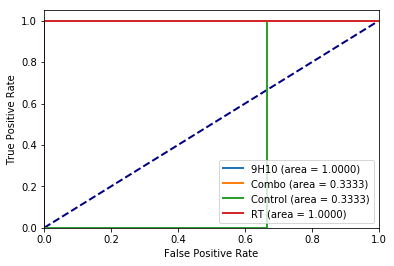

In [3]:
DTCR_WF.AUC_Curve()

You might notice that given how small this dataset is, doing one training split does not give us a good assesment for how predictive the TCR signature may be. In this case, we would want to use a K-fold cross validation to train on 19 of the samples and test on 1 and iterate until we've covered the entire cohort. When calling the K-fold cross validation command, one can provide the number of folds or if none is provided, it assumes a leave-one-out strategy.

In [4]:
%%capture
DTCR_WF.K_Fold_CrossVal()

We can then assess the performance once again through plotting the ROC curves.

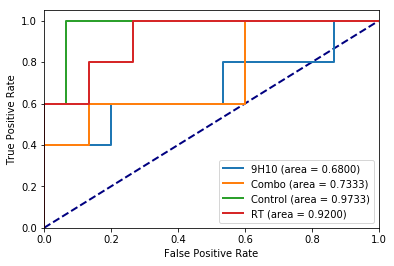

In [5]:
DTCR_WF.AUC_Curve()

Once our algorithm has been trained, we may want to see which sequences are the most strongly predicted for each label. To do this we will run the following command. The output of the command is a dictionary of dataframes within the object we can view. Additionally, these dataframes can be found in the results folder underneath the subdirectory 'Rep_Sequences'.

In [6]:
DTCR_WF.Representative_Sequences()

In [7]:
print(DTCR_WF.Rep_Seq['Control'])

      alpha            beta      v_beta      d_beta      j_beta v_alpha  \
13463  None    CESGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
14191  None      CASGDWEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
13599  None       CASGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
13907  None     CASGDAYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
12114  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
12367  None    CASSEGAYEQYF  TCRBV13-01  unresolved  TCRBJ02-07    None   
14919  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
11239  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
14138  None  CASGDWRSSYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
13159  None    FASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   

      j_alpha    Class         Sample      Freq  Counts          9H10  \
13463    None  Control  CONTROL-5.tsv  0.000197       1  5.883897e-10   
14191    None  Control  CONT

Furthermore, we may want to know which learned motifs are associated with a given label. To do this, we can run the following command with the label we want to know the predictive motifs for.

In [9]:
DTCR_WF.Motif_Identification('Control')

Motif Identification Completed


The motifs can then be found in fasta files in the results folder underneath (label)(alpha/beta)Motifs. These fasta fiels can then be used with "https://weblogo.berkeley.edu/logo.cgi" for motif visualization.